In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import geopandas as gpd


In [2]:
# extraction des shapefiles
gdp = gpd.read_file('data\/france\/france.shp')

gdp


,INSEE_COM,INSEE_DEP,NOM,NOM_M,geometry
0,01001,01,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,"POLYGON ((4.95841 46.15327, 4.95812 46.15316, ..."
1,01002,01,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,"POLYGON ((5.43020 45.98277, 5.43012 45.98289, ..."
2,01004,01,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,"POLYGON ((5.40882 45.94206, 5.40850 45.94210, ..."
3,01005,01,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,"POLYGON ((4.94298 45.97962, 4.94257 45.97949, ..."
4,01006,01,Ambléon,AMBLEON,"POLYGON ((5.57083 45.75338, 5.57219 45.75357, ..."
...,...,...,...,...,...
34853,95676,95,Villers-en-Arthies,VILLERS-EN-ARTHIES,"POLYGON ((1.74099 49.09916, 1.74121 49.09853, ..."
34854,95678,95,Villiers-Adam,VILLIERS-ADAM,"POLYGON ((2.27391 49.07659, 2.27371 49.07656, ..."
34855,95680,95,Villiers-le-Bel,VILLIERS-LE-BEL,"POLYGON ((2.41002 49.02415, 2.41038 49.02413, ..."
34856,95682,95,Villiers-le-Sec,VILLIERS-LE-SEC,"POLYGON ((2.39620 49.08669, 2.39623 49.08667, ..."


In [3]:
birth = pd.read_csv('data/base_naissances_2021.csv',
                    sep=';', index_col='CODGEO')  # naissances depuis 2014
death = pd.read_csv('data/base_deces_2021.csv', sep=';',
                    index_col='CODGEO')  # morts depuis 2014
DEATHS = death.rename(columns={'DECESD14': '14NETNAT', 'DECESD15': '15NETNAT', 'DECESD16': '16NETNAT', 'DECESD17': '17NETNAT', 'DECESD18': '18NETNAT', 'DECESD19': '19NETNAT',
                               'DECESD20': '20NETNAT', 'DECESD21': '21NETNAT'})
BIRTHS = birth.rename(columns={'NAISD14': '14NETNAT', 'NAISD15': '15NETNAT', 'NAISD16': '16NETNAT', 'NAISD17': '17NETNAT', 'NAISD18': '18NETNAT', 'NAISD19': '19NETNAT',
                               'NAISD20': '20NETNAT', 'NAISD21': '21NETNAT'})
NETNAT = (BIRTHS-DEATHS).merge(gdp, how='right',
                               left_on='CODGEO', right_on='INSEE_COM')  # NATURAL CHANGE
NETNAT['TOT'] = NETNAT[NETNAT.columns[0:5]].sum(axis=1)
NETNAT


,14NETNAT,15NETNAT,16NETNAT,17NETNAT,18NETNAT,19NETNAT,20NETNAT,21NETNAT,INSEE_COM,INSEE_DEP,NOM,NOM_M,geometry,TOT
0,1.0,8.0,3.0,6.0,1.0,-2.0,3.0,7.0,01001,01,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,"POLYGON ((4.95841 46.15327, 4.95812 46.15316, ...",19.0
1,2.0,4.0,5.0,2.0,0.0,-2.0,1.0,-3.0,01002,01,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,"POLYGON ((5.43020 45.98277, 5.43012 45.98289, ...",13.0
2,125.0,101.0,95.0,82.0,108.0,62.0,87.0,83.0,01004,01,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,"POLYGON ((5.40882 45.94206, 5.40850 45.94210, ...",511.0
3,8.0,8.0,11.0,7.0,9.0,19.0,7.0,32.0,01005,01,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,"POLYGON ((4.94298 45.97962, 4.94257 45.97949, ...",43.0
4,-1.0,0.0,2.0,0.0,-1.0,0.0,-1.0,1.0,01006,01,Ambléon,AMBLEON,"POLYGON ((5.57083 45.75338, 5.57219 45.75357, ...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34853,4.0,3.0,6.0,3.0,1.0,5.0,-2.0,4.0,95676,95,Villers-en-Arthies,VILLERS-EN-ARTHIES,"POLYGON ((1.74099 49.09916, 1.74121 49.09853, ...",17.0
34854,0.0,-4.0,-4.0,3.0,1.0,-3.0,1.0,6.0,95678,95,Villiers-Adam,VILLIERS-ADAM,"POLYGON ((2.27391 49.07659, 2.27371 49.07656, ...",-4.0
34855,504.0,506.0,441.0,515.0,458.0,463.0,413.0,404.0,95680,95,Villiers-le-Bel,VILLIERS-LE-BEL,"POLYGON ((2.41002 49.02415, 2.41038 49.02413, ...",2424.0
34856,2.0,5.0,4.0,3.0,4.0,2.0,4.0,2.0,95682,95,Villiers-le-Sec,VILLIERS-LE-SEC,"POLYGON ((2.39620 49.08669, 2.39623 49.08667, ...",18.0


In [4]:
def extract_NETMOB(path, year, sep=';'):
    '''Fonction qui prend le chemin d'une dataframe et en extrait
    la mobilité résidentielle nette de l'année year'''
    df = pd.read_csv(path, sep=sep)  # lecture du fichier

    # conversion de tout en str pour que ça soit comode
    df['CODGEO'] = df['CODGEO'].astype(str)
    L = list(df['CODGEO'].unique())
    df['DCRAN'] = df['DCRAN'].astype(str)
    df = df[(df.DCRAN != '99999') & (
        df.DCRAN != df.CODGEO)].reset_index(drop=True)  # Que les mobilités résidentielles + ne pas compter ceux qui sont restés

    # Nombre d'arrivants dans chaque commune
    arrivants = df.groupby('CODGEO').sum()
    arrivants['Ca'] = arrivants.index.values

    depart = df.groupby('DCRAN').sum()  # Nombre de départs dans chaque commune
    depart['Cd'] = depart.index.values

    # On merge les deux, ça fait plein de Nan
    data = arrivants.merge(depart, how='outer', left_on='Ca', right_on='Cd')
    # résolution du problème
    la = list(data['Ca'])
    nan = (la[-1])
    ld = list(data['Cd'])
    L = []
    n = len(la)
    for k in range(n):
        if la[k] != nan:
            L.append(ld[k])
        else:
            L.append(la[k])
    data['COM'] = L
    # Fin résolution du problème

    data = data[['NBFLUX_C'+year+'_POP01P_x',
                 'NBFLUX_C'+year+'_POP01P_y', 'COM']]
    # Restructuration pour y voir clair
    data.rename(columns={'NBFLUX_C'+year+'_POP01P_y': 'INMOB'}, inplace=True)
    data.rename(columns={'NBFLUX_C'+year+'_POP01P_x': 'OUTMOB'}, inplace=True)

    data = data.fillna(0)
    data['NETMOB'] = data['INMOB'] - data['OUTMOB']
    data3 = data.merge(gdp, how='right', left_on='COM', right_on='INSEE_COM')
    data3['NETMOB'] = data3['NETMOB'].fillna(
        0)  # Là où il s'est rien passé, on met 0
    return data3[['COM', 'NETMOB']]


NETMOB = pd.DataFrame(list(gdp['INSEE_COM']), columns=['CODGEO'])
NETMOB['19NETMOB'] = extract_NETMOB(
    'data\Base-flux-mobilite-residentielle-2019.csv', '19')['NETMOB']
NETMOB['18NETMOB'] = extract_NETMOB(
    'data\Base-flux-mobilite-residentielle-2018.csv', '18')['NETMOB']
NETMOB['17NETMOB'] = extract_NETMOB(
    'data\Base-flux-mobilite-residentielle-2017.csv', '17')['NETMOB']
NETMOB['16NETMOB'] = extract_NETMOB(
    'data\Base-texte-flux-mobilite-residentielle-2016.csv', '16', sep=',')['NETMOB']
NETMOB['15NETMOB'] = extract_NETMOB(
    'data\Base-texte-flux-mobilite-residentielle-2015.csv', '15', sep=',')['NETMOB']
NETMOB['14NETMOB'] = extract_NETMOB(
    'data\Base-texte-flux-mobilite-residentielle-2014.csv', '14', sep=',')['NETMOB']
NETMOB['TOT'] = NETMOB[NETMOB.columns[3:]].sum(axis=1)
NETMOB


C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3458955335.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)  # lecture du fichier
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3458955335.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arrivants = df.groupby('CODGEO').sum()
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3458955335.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  depart = df.groupby('DCRAN').sum()  # Nombre de départs dans chaque commune
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\

,CODGEO,19NETMOB,18NETMOB,17NETMOB,16NETMOB,15NETMOB,14NETMOB,TOT
0,01001,-3.255833,-3.455731,-4.020663,-10.444683,-8.936528,-7.662535,-31.064409
1,01002,3.667185,3.491188,6.896560,-2.813291,9.332759,9.649509,23.065537
2,01004,-13.714999,-18.848049,-4.222022,-97.034028,-119.837136,18.957003,-202.136183
3,01005,10.107840,13.307272,114.537056,89.496172,92.995766,48.307486,345.336480
4,01006,-4.920940,-5.035275,-5.032773,-5.000000,-4.957853,-5.006614,-19.997241
...,...,...,...,...,...,...,...,...
34853,95676,29.575433,28.196243,28.024594,36.878488,37.575687,29.980505,132.459274
34854,95678,-12.132058,-12.183988,-49.729430,-44.354084,-41.236191,-53.549930,-188.869634
34855,95680,539.294564,834.426833,774.896587,728.124035,690.555996,620.013964,2813.590582
34856,95682,-5.914197,-5.636636,-4.412171,4.989460,10.625312,14.754102,25.956703


In [5]:
def extract_INMIG(path, year, sep=';'):
    '''Fonction qui prend le chemin d'une dataframe et en extrait
    la mobilité étrangère sortante de l'année year'''
    df = pd.read_csv(path, sep=sep)  # dataframe d'où extraire l'information
    # conversion en str pour éviter les merdes
    df['CODGEO'] = df['CODGEO'].astype(str)

    df = df[df.DCRAN == '99999'].rename(
        columns={'NBFLUX_C'+year+'_POP01P': 'INMIG'})[['CODGEO', 'INMIG']]

    data = df.merge(gdp, how='right', left_on='CODGEO', right_on='INSEE_COM')[
        ['NOM', 'INSEE_COM', 'INMIG']]
    data['INMIG'] = data['INMIG'].fillna(0.)
    return data


INMIG = pd.DataFrame(list(gdp['INSEE_COM']), columns=['CODGEO'])
INMIG['19INMIG'] = extract_INMIG(
    'data\Base-flux-mobilite-residentielle-2019.csv', '19')['INMIG']
INMIG['18INMIG'] = extract_INMIG(
    'data\Base-flux-mobilite-residentielle-2018.csv', '18')['INMIG']
INMIG['17INMIG'] = extract_INMIG(
    'data\Base-flux-mobilite-residentielle-2017.csv', '17')['INMIG']
INMIG['16INMIG'] = extract_INMIG(
    'data\Base-texte-flux-mobilite-residentielle-2016.csv', '16', sep=',')['INMIG']
INMIG['15INMIG'] = extract_INMIG(
    'data\Base-texte-flux-mobilite-residentielle-2015.csv', '15', sep=',')['INMIG']
INMIG['14INMIG'] = extract_INMIG(
    'data\Base-texte-flux-mobilite-residentielle-2014.csv', '14', sep=',')['INMIG']
INMIG['TOT'] = INMIG[INMIG.columns[3:]].sum(axis=1)
INMIG


C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\2687951644.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)  # dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\2687951644.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)  # dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\2687951644.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)  # dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\2687951644.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=sep)  # dataframe d'où extraire l'information
C:\Users\scapp\AppData\Local\Tem

,CODGEO,19INMIG,18INMIG,17INMIG,16INMIG,15INMIG,14INMIG,TOT
0,01001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,01002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,01004,54.397650,56.082067,45.019538,72.050091,58.624688,65.962344,241.656661
3,01005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,01006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
34853,95676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34854,95678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34855,95680,82.891311,82.882064,89.113690,70.085212,59.319872,60.384540,278.903313
34856,95682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
POP = pd.read_excel('data\/base-pop-historiques-1876-2020.xlsx',skiprows = 5,sheet_name = 'pop_1876_2020')

POP = POP.merge(gdp,left_on = 'CODGEO',right_on = 'INSEE_COM',how = 'right')


def exctract_popinc(i,f):
    VARPOP = POP[POP.columns[:4]]
    VARPOP['POPINC'] = POP['PMUN'+f]-POP['PMUN'+i]
    return VARPOP
VARPOP13_14 = exctract_popinc('13','14')
VARPOP14_15 = exctract_popinc('14','15')
VARPOP15_16 = exctract_popinc('15','16')
VARPOP16_17 = exctract_popinc('16','17')
VARPOP17_18 = exctract_popinc('17','18')
VARPOP18_19 = exctract_popinc('18','19')


C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\672839006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VARPOP['POPINC'] = POP['PMUN'+f]-POP['PMUN'+i]
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\672839006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VARPOP['POPINC'] = POP['PMUN'+f]-POP['PMUN'+i]
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\672839006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [7]:
VARPOP13_14['NETMOB'] = NETMOB['14NETMOB']
VARPOP14_15['NETMOB'] = NETMOB['15NETMOB']
VARPOP15_16['NETMOB'] = NETMOB['16NETMOB']
VARPOP16_17['NETMOB'] = NETMOB['17NETMOB']
VARPOP17_18['NETMOB'] = NETMOB['18NETMOB']
VARPOP18_19['NETMOB'] = NETMOB['19NETMOB']

'''VARPOP13_14['INMIG'] = INMIG['14INMIG']
VARPOP14_15['INMIG'] = INMIG['15INMIG']
VARPOP15_16['INMIG'] = INMIG['16INMIG']
VARPOP16_17['INMIG'] = INMIG['17INMIG']
VARPOP17_18['INMIG'] = INMIG['18INMIG']
VARPOP18_19['INMIG'] = INMIG['19INMIG']'''

VARPOP13_14['NETNAT'] = NETNAT['14NETNAT']
VARPOP14_15['NETNAT'] = NETNAT['15NETNAT']
VARPOP15_16['NETNAT'] =  NETNAT['16NETNAT']
VARPOP16_17['NETNAT'] =  NETNAT['17NETNAT']
VARPOP17_18['NETNAT'] =  NETNAT['18NETNAT']
VARPOP18_19['NETNAT'] =  NETNAT['19NETNAT']


VARPOP13_14['NETMIG'] = VARPOP13_14['POPINC'] - VARPOP13_14['NETNAT'] - VARPOP13_14['NETMOB']
VARPOP14_15['NETMIG'] = VARPOP14_15['POPINC'] - VARPOP14_15['NETNAT'] - VARPOP14_15['NETMOB']
VARPOP15_16['NETMIG'] = VARPOP15_16['POPINC'] - VARPOP15_16['NETNAT'] - VARPOP15_16['NETMOB']
VARPOP16_17['NETMIG'] = VARPOP16_17['POPINC'] - VARPOP16_17['NETNAT'] - VARPOP16_17['NETMOB']
VARPOP17_18['NETMIG'] = VARPOP17_18['POPINC'] - VARPOP17_18['NETNAT'] - VARPOP17_18['NETMOB']
VARPOP18_19['NETMIG'] = VARPOP18_19['POPINC'] - VARPOP18_19['NETNAT'] - VARPOP18_19['NETMOB']

VARPOP13_14['POP'] = POP['PMUN13']
VARPOP14_15['POP'] = POP['PMUN14']
VARPOP15_16['POP'] = POP['PMUN15']
VARPOP16_17['POP'] = POP['PMUN16']
VARPOP17_18['POP'] = POP['PMUN17']
VARPOP18_19['POP'] = POP['PMUN18']






VARPOP13_14['TIME'] = 2014 
VARPOP14_15['TIME'] = 2015
VARPOP15_16['TIME'] = 2016
VARPOP16_17['TIME'] = 2017
VARPOP17_18['TIME'] = 2018
VARPOP18_19['TIME'] = 2019

frames = [VARPOP18_19,VARPOP17_18,VARPOP16_17,VARPOP15_16,VARPOP14_15,VARPOP13_14]

VARPOP = pd.concat(frames).reset_index()



VARPOP.columns

C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3815755329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VARPOP13_14['NETMOB'] = NETMOB['14NETMOB']
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3815755329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VARPOP14_15['NETMOB'] = NETMOB['15NETMOB']
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3815755329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Index(['index', 'CODGEO', 'REG', 'DEP', 'LIBGEO', 'POPINC', 'NETMOB', 'NETNAT',
       'NETMIG', 'POP', 'TIME'],
      dtype='object')

In [19]:
dataframe = pd.read_pickle('data\demo.pkl')

i = 2014
f = 2019
L = []  
for p in range(i, f+1):
    L.append(dataframe[dataframe.TIME == p])

final = L[0][['CODGEO', 'REG', 'DEP', 'LIBGEO']]

final['POPINC'] = L[0]['POPINC']
final['NETNAT'] = L[0]['NETNAT']
final['NETMOB'] = L[0]['NETMOB']
final['NETMIG'] = L[0]['NETMIG']
final = final.reset_index()
for p in range(1, len(L)):
    data_frame = L[p].reset_index()
    final['POPINC'] = final['POPINC'] + data_frame['POPINC']
    final['NETNAT'] = final['NETNAT'] + data_frame['NETNAT']
    final['NETMOB'] = final['NETMOB'] + data_frame['NETMOB']
    final['NETMIG'] = final['NETMIG'] + data_frame['NETMIG']

final['POPI'] = dataframe[dataframe.TIME == i].reset_index()['POP']
final = final.reset_index()
final = final[final.columns[2:]]

final['POPINC_RATE'] = final['POPINC']/final['POPI']
final['NETNAT_RATE'] = final['NETNAT']/final['POPI']
final['NETMIG_RATE'] = final['NETMIG']/final['POPI']
final['NETMOB_RATE'] = final['NETMOB']/final['POPI']


final = final[['CODGEO','REG','DEP','LIBGEO','POPINC_RATE','NETNAT_RATE','NETMIG_RATE','NETMOB_RATE']]
final
    


C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3815733926.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['POPINC'] = L[0]['POPINC']
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3815733926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['NETNAT'] = L[0]['NETNAT']
C:\Users\scapp\AppData\Local\Temp\ipykernel_32248\3815733926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,CODGEO,REG,DEP,LIBGEO,POPINC_RATE,NETNAT_RATE,NETMIG_RATE,NETMOB_RATE
0,01001,84.0,01,L' Abergement-Clémenciat,0.015645,0.022164,0.042733,-0.049252
1,01002,84.0,01,L' Abergement-de-Varey,0.084746,0.046610,-0.089932,0.128067
2,01004,84.0,01,Ambérieu-en-Bugey,-0.015670,0.039905,-0.039230,-0.016345
3,01005,84.0,01,Ambérieux-en-Dombes,0.070948,0.037920,-0.192509,0.225536
4,01006,84.0,01,Ambléon,0.037037,0.000000,0.314384,-0.277347
...,...,...,...,...,...,...,...,...
34853,95676,11.0,95,Villers-en-Arthies,-0.004065,0.044715,-0.435429,0.386648
34854,95678,11.0,95,Villiers-Adam,0.021352,-0.008304,0.282545,-0.252889
34855,95680,11.0,95,Villiers-le-Bel,0.040678,0.105704,-0.218340,0.153314
34856,95682,11.0,95,Villiers-le-Sec,0.055866,0.111732,-0.136346,0.080480


In [8]:
    
    
data = pd.read_csv('data\/allesclar.csv')[['CODGEO', 'REG', 'DEP', 'LIBGEO',
       'POPINC', 'NETMOB', 'NETNAT', 'NETMIG', 'TIME']]#your path
data = data[data.DEP == '08']
gdpp = gpd.read_file('data\/france\/france.shp')
gpdd = gdpp[gdpp.INSEE_DEP == '08'][  #your path
    ['INSEE_COM', 'INSEE_DEP', 'geometry']]
gdpp = gdpp.rename(columns={'INSEE_COM':'CODGEO'})
geojson_dict = gdpp[['CODGEO', 'geometry']].__geo_interface__#données format GEOJson



def prepare_datamap(i,f):
    '''fonction qui prépare la dataframe à ploter
        i : année initiale
        f : année finale'''
    if i<=f:
        
        L = []
        for p in range(i, f+1):
            L.append(data[data.TIME == p])

        final = L[0][['CODGEO', 'REG', 'DEP','LIBGEO']]



        final['POPINC'] = L[0]['POPINC']
        final['NETNAT'] = L[0]['NETNAT']
        final['NETMOB'] = L[0]['NETMOB']    
        final['NETMIG'] = L[0]['NETMIG']
        final = final.reset_index()
        for p in range(1, len(L)):
            data_frame = L[p].reset_index()
            final['POPINC'] = final['POPINC'] + data_frame['POPINC']
            final['NETNAT'] = final['NETNAT'] +data_frame['NETNAT']
            final['NETMOB'] = final['NETMOB'] + data_frame['NETMOB']
            final['NETMIG'] = final['NETMIG'] + data_frame['NETMIG']

        final = final.reset_index()

        
        final['CAUSE'] = np.abs(final[['NETNAT', 'NETMOB', 'NETMIG']]).idxmax(
        axis=1)  # maximum des valeurs absolues des composantes
        def signe(x): return (x > 0) + (x < 0)*(-1)# Si la population a augmenté ou baissé
        final['SGN'] = signe(final['POPINC'])
        final['C'] = np.arange(len(final))
        for index in range(len(final)):
            if final['SGN'][index] == -1:
                if final['CAUSE'][index] == 'NETMOB':
                    final['C'][index] = 'NETMOB -'
                elif final['CAUSE'][index] == 'NETNAT':
                    final['C'][index] = 'NETNAT -'
                else:
                    final['C'][index] = 'NETMIG -'
            else:
                if final['CAUSE'][index] == 'NETMOB':
                    final['C'][index] = 'NETMOB +'
                elif final['CAUSE'][index] == 'NETNAT':
                    final['C'][index] = 'NETNAT +'
                else:
                    final['C'][index] = 'NETMIG +'

        
        return final

carte = prepare_datamap(2014,2016)

carte

C:\Users\scapp\AppData\Local\Temp\ipykernel_25188\1705328205.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data\/allesclar.csv')[['CODGEO', 'REG', 'DEP', 'LIBGEO',
C:\Users\scapp\AppData\Local\Temp\ipykernel_25188\1705328205.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['POPINC'] = L[0]['POPINC']
C:\Users\scapp\AppData\Local\Temp\ipykernel_25188\1705328205.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin

,level_0,index,CODGEO,REG,DEP,LIBGEO,POPINC,NETNAT,NETMOB,NETMIG,CAUSE,SGN,C
0,0,176655,08001,44.0,08,Acy-Romance,-9.0,-9.0,30.467220,-30.467220,NETMOB,-1,NETMOB -
1,1,176656,08003,44.0,08,Aiglemont,-19.0,7.0,104.447006,-130.447006,NETMIG,-1,NETMIG -
2,2,176657,08004,44.0,08,Aire,4.0,7.0,-0.733994,-2.266006,NETNAT,1,NETNAT +
3,3,176658,08005,44.0,08,Alincourt,1.0,4.0,92.752841,-95.752841,NETMIG,1,NETMIG +
4,4,176659,08006,44.0,08,Alland'Huy-et-Sausseuil,-21.0,-6.0,61.199033,-76.199033,NETMIG,-1,NETMIG -
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,444,177099,08499,44.0,08,Wasigny,-16.0,3.0,94.763436,-113.763436,NETMIG,-1,NETMIG -
445,445,177100,08500,44.0,08,Wignicourt,-3.0,-1.0,0.000000,-2.000000,NETMIG,-1,NETMIG -
446,446,177101,08501,44.0,08,Williers,-9.0,-2.0,0.000000,-7.000000,NETMIG,-1,NETMIG -
447,447,177102,08502,44.0,08,Yoncq,-3.0,-2.0,89.890365,-90.890365,NETMIG,-1,NETMIG -


In [9]:
import plotly.express as px
comp = 'NETMIG'
u = gdpp['geometry'].iloc[0].centroid
fig = px.choropleth_mapbox(
        carte,
        geojson=geojson_dict,
        locations='CODGEO',
        color=comp,
        featureidkey="properties.CODGEO",
        color_continuous_scale="Viridis",
        opacity=0.5,
        labels={comp: comp},
        center={"lon": u.x, "lat": u.y},
        zoom=6
    )



In [19]:
# Création de colonnes pour la visualisation
VARPOP['CAUSE'] = np.abs(VARPOP[['NETNAT', 'NETMOB', 'NETMIG']]).idxmax(
    axis=1)  # maximum des valeurs absolues des composantes


def signe(x): return (x > 0) + (x < 0)*(-1)


# Si la population a augmenté ou baissé
VARPOP['SGN'] = signe(VARPOP['POPINC'])


VARPOP['C'] = np.arange(len(VARPOP))
# VARPOP[(VARPOP.SGN == -1) & (VARPOP.CAUSE == 'NETMOB')]['C'] = 'NETMOB -'
for index in range(len(VARPOP)):
    if VARPOP['SGN'][index] == -1:
        if VARPOP['CAUSE'][index] == 'NETMOB':
            VARPOP['C'][index] = 'NETMOB -'
        elif VARPOP['CAUSE'][index] == 'NETNAT':
            VARPOP['C'][index] = 'NETNAT -'
        else:
            VARPOP['C'][index] = 'NETMIG -'
    else:
        if VARPOP['CAUSE'][index] == 'NETMOB':
            VARPOP['C'][index] = 'NETMOB +'
        elif VARPOP['CAUSE'][index] == 'NETNAT':
            VARPOP['C'][index] = 'NETNAT +'
        else:
            VARPOP['C'][index] = 'NETMIG +'
VARPOP


C:\Users\scapp\AppData\Local\Temp\ipykernel_16600\1395252647.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VARPOP['C'][index] = 'NETMOB +'


,CODGEO,DEP,NETNAT,NETMIG,NETMOB,POPINC,CAUSE,SGN,C
0,01001,01,19.0,23.070124,-31.064409,11.005715,NETMOB,1,NETMOB +
1,01002,01,13.0,0.971859,23.065537,37.037395,NETMOB,1,NETMOB +
2,01004,01,511.0,-522.872573,-202.136183,-214.008756,NETMIG,-1,NETMIG -
3,01005,01,43.0,-250.064504,345.336480,138.271976,NETMOB,1,NETMOB +
4,01006,01,0.0,26.620617,-19.997241,6.623377,NETMIG,1,NETMIG +
...,...,...,...,...,...,...,...,...,...
34853,95676,95,17.0,-142.656093,132.459274,6.803181,NETMIG,1,NETMIG +
34854,95678,95,-4.0,218.808859,-188.869634,25.939225,NETMIG,1,NETMIG +
34855,95680,95,2424.0,-4109.261413,2813.590582,1128.329169,NETMIG,1,NETMIG +
34856,95682,95,18.0,-42.284387,25.956703,1.672316,NETMIG,1,NETMIG +


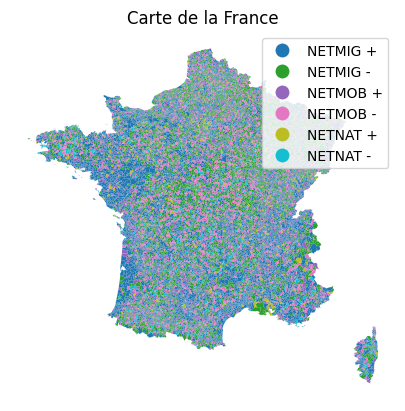

In [20]:
data = gpd.GeoDataFrame(VARPOP.merge(
    gdp, how='right', left_on='CODGEO', right_on='INSEE_COM'), geometry='geometry')
fig, ax = plt.subplots(1,1)



data.plot('C', legend=True,ax = ax)


ax.set_title('Carte de la France')
ax.set_axis_off()

plt.show()
#plt.savefig('carte stylisée')
